In [49]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Basic Pre-Processing

In [50]:
df.drop('Unnamed: 32',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('diagnosis',axis=1),df['diagnosis'],test_size=0.2)

In [52]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

In [53]:
x_train_tensor=torch.tensor(x_train.values,dtype=torch.float32)
x_test_tensor=torch.tensor(x_test.values,dtype=torch.float32)
y_train_tensor=torch.tensor(y_train,dtype=torch.float32)
y_test_tensor=torch.tensor(y_test,dtype=torch.float32)

Create a Model
`Forward Pass->
Loss Function->Back-Propagation->Update Your Weights`

In [54]:
learning_paramter=0.7;
epochs=200
class my_nn():
  def __init__(self,X):
    self.w=torch.randn(x_train_tensor.shape[1],1,dtype=torch.float32,requires_grad=True)
    self.b=torch.zeros(1,dtype=torch.float32,requires_grad=True)
  def forward(self,x):
    return torch.sigmoid(torch.matmul(x,self.w)+self.b)

In [55]:
model=my_nn(x_train_tensor)
y_pred=model.forward(x_train_tensor)
loss_fxn=torch.binary_cross_entropy_with_logits(y_pred,y_train_tensor.unsqueeze(1))
loss_fxn.mean().backward()


In [56]:
with torch.no_grad():
  model.w += learning_paramter * model.w.grad
  model.b += learning_paramter * model.b.grad

In [57]:
model.w.grad.zero_()
model.b.grad.zero_()

tensor([0.])

In [58]:
loss_history = []
for epochs in range(epochs):
  model=my_nn(x_train_tensor)
  y_pred=model.forward(x_train_tensor)
  loss_fxn=torch.binary_cross_entropy_with_logits(y_pred,y_train_tensor.unsqueeze(1))
  loss_history.append(loss_fxn.mean().item()) # Store the mean loss
  loss_fxn.mean().backward()
  with torch.no_grad():
    model.w += learning_paramter * model.w.grad
    model.b += learning_paramter * model.b.grad
    model.w.grad.zero_()
    model.b.grad.zero_()
  if(epochs%20==0):
    print(f'loss:{loss_history[-1]},epoch:{epochs+1}')

loss:0.9418333172798157,epoch:1
loss:0.6931473016738892,epoch:21
loss:0.6931473016738892,epoch:41
loss:0.9418333172798157,epoch:61
loss:0.6931473016738892,epoch:81
loss:0.9337916970252991,epoch:101
loss:0.6931473016738892,epoch:121
loss:0.9526870846748352,epoch:141
loss:0.6931473016738892,epoch:161
loss:0.9418333172798157,epoch:181


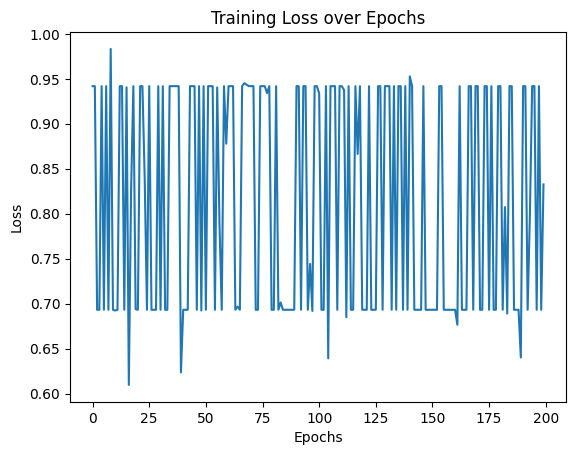

In [60]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()